In [2]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


### Chapter 1 Linear Regression with One Variable

In this chapter we are concerned with regression analysis with a single predictor variable.

We first distinguish between *functional* and *statistical* relationships between variables. A *functional relation* takes the form 
$$
Y = f(X),
$$
where given a function $f(\cdot)$ and input $X$, the value of $Y$ is determined.

A *statistical relation* is not a perfect relation, as is the functional, but exhibits some degree of randomness.

The basic ingredients of a statistical relationship, which a regression model is a formal means of expressing, are 

1. The response variable $Y$ has a probability distribution for each value of the predictor $X$.
2. The means of these distributions vary in some systematic way with $X$.

This systematic relation is called the *regression function of Y on X$. Both the shape of the regression function and the probability distributions may vary from model to model.

Selecting predictor variables is an important part of regression modeling. Typically a predictor is considered a "good" one if it reduces the remaining variation in $Y$.

**Simple Linear Regression Model with Distribution of Error Terms Unspecified**

One predictor, linear model of the form:
$$
Y_i = \beta_0 + \beta_1 X_i + \epsilon_i,
$$

where $i$ refers to the $i^{th}$ trial, $X_i$ is the value of the predictor on the $i^{th}$ trial, and $\epsilon_i$ is the random error term with $E[\epsilon_i]=0$ and $\sigma^2[\epsilon_i]=\sigma^2$ and $\epsilon_i$ and $\epsilon_j$ are uncorrelated.

This is a *simple, first-order* model because it is linear in both the predictor and parameters and has only one predictor.

Thus,

\begin{align}
E[Y_i] &= \beta_0 + \beta_1X_i \\
V[Y_i] &= V[\epsilon_i] = \sigma^2
\end{align}

*Estimating the Parameters of the Regression Model*

The most common approach is to use *the method of least squares*. Here the goal is to minimize the sum of squared differences of our estimate from the actual data points:

$$
Q = \Sigma_i (Y_i - \beta_0 - \beta_1X_i)^2
$$

In the above equation, we need to find estimates for $\beta_0$ and $\beta_1$, which we can do analytically in this case, although sometimes numerical methods are required due to the complexity of $Q$ under different circumstances and assumptions. To minimize Q, we take the derivative set equal to zero and solve for the parameters (checking with the second derivative that this is indeed a minimum). 

\begin{align}
\frac{\partial{Q}}{\partial{\beta_0}} &= -2\sum_i\big( Y_i - \beta_0 - \beta_1X_i \big) = 0 \\
&= \sum_iY_i - \sum_ib_0 - \sum_ib_1X_i \\
\sum_i Y_i &= n b_1 + b1\sum_i X_i
\end{align}


\begin{align}
\frac{\partial{Q}}{\partial{\beta_1}} &= -2\sum_iX_i\big( Y_i - \beta_0 - \beta_1X_i \big) = 0 \\
&= \sum_iX_iY_i - b_0\sum_iX_i - \sum_ib_1X_i^2 \\
\sum_iX_iY_i &= b_0\sum_iX_i + \sum_ib_1X_i^2
\end{align}


We arrive at the following:

\begin{align}
\beta_1 = \frac{\Sigma(X_i - \bar{X})(Y_i - \bar{Y})}{\Sigma(X_i - \bar{X})^2} = \frac{Cov(XY)}{Var(X)} \\
\beta_0 = \frac{1}{n}(\Sigma Y_i - b_1\Sigma X_i) = \bar{Y} - b_1\bar{X}
\end{align}

The *Gauss-Markov Theorem* states that under the conditions of the standard regression model, the above estimators are *unbiased* and *minimum variance*.

$\hat{Y} = b_0 + b_1 X$ is the unbiased, minimum variance estimator of $E[Y] = \beta_0 + \beta_1 X$, which is the mean of the probability distribution corresponding to $Y$ at the level $X$.

*Residuals*

The residual $e_i = Y_i - \hat{Y}_i$ and is the difference between the fitted and observed $Y_i$ values for a given level of $X_i$.

Some properties of the fitted regression line include:

1. The sum of residuals, $\Sigma{e_i} = 0$
2. The sum of squared residuals is a minimum (this is Q)
3. Sum of observed values equals sum of fitted values, $\Sigma{Y_i} = \Sigma{\hat{Y}_i}$
4. $\Sigma{X_ie_i} = 0$
5. $\Sigma{\hat{Y}_ie_i} = 0$
6. The regression line always goes through the point $(\bar{X},\bar{Y})$

**Estimation of Variance of Error Terms**

For sampling from a single population the variance is estimated using the *sample variance*

$$
s^2 = \frac{\Sigma(Y_i - \bar{Y})}{n-1}
$$

For the regression model with which we are working, we recall that there are various levels of the predictor and thus the response $Y_i$ have different means associated with them (but given our assumptions, equivalent variance around these means). Therefore, the *sum of squares error* is given by:

$$
SSE = \Sigma_{i=0}^n(Y_i - \hat{Y_i})^2 = \Sigma_{i=0}^n{e_i}^2
$$

which is normalized by $\frac{1}{n-2}$ to give the *MSE, means squared error*, the expected value of which, $E[MSE] = \sigma^2$.

**The Normal Error Regression Model**

Here we assume that $\epsilon_i \sim N(0,\sigma^2)$. Now to estimate the parameters $\beta_0, \beta_1$ we use the *method of maximum likelihood*. Here we work with a likelihood function $L(\cdot)$ of our parameter of interest, which is a product of probability densities of our observed responses $Y_i$ given a parameter of interest. Our model then for a response is 

$$
f_i = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\Bigg({-\frac{1}{2}\Big(\frac{Y_i - \beta_0 - \beta_1 X_i}{\sigma}\Big)^2}\Bigg),
$$

and,

$$
L(\beta_0, \beta_1, \sigma^2) = \Pi_i f_i.
$$

The maximum likelihood estimates of of $\beta_0, \beta_1 = b_0, b_1$ as before, while that for $\sigma^2 = \frac{\Sigma(Y_i - \bar{Y})^2}{n}$.

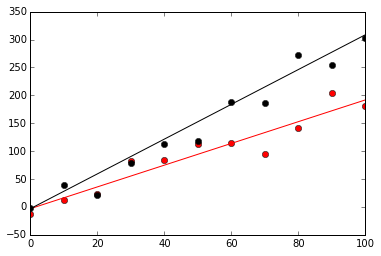

In [3]:
# Generate data
x = np.arange(0, 110, 10)
c1 = 2*x + (np.random.randn(11) * 20)
c2 = 3*x + (np.random.randn(11) * 20)

# Get regression coefficients
xbar = np.mean(x)
c1bar = np.mean(c1)
c2bar = np.mean(c2)
b1_c1 = np.sum((x - xbar)*(c1-c1bar)) / np.sum(np.power((x-xbar), 2))
b1_c2 = np.sum((x - xbar)*(c2-c2bar)) / np.sum(np.power((x-xbar), 2))
b0_c1 = c1bar - b1_c1*xbar
b0_c2 = c1bar - b1_c1*xbar

# Plot data and regression lines
plt.plot(x, c1, 'ro')
plt.plot(x, b0_c1 + b1_c1*x, 'r-')
plt.plot(x, c2, 'ko')
plt.plot(x, b0_c2 + b1_c2*x, 'k-')

### Chapter 2 Inference Regarding Regression Parameters

####2.1 Inferences Concerning $\beta_1$

The first inference we are interested in is whether to reject $H_0: \beta_1=0$. If $\beta_1=0$, we conclude that there is no relationship between $X$ and $Y$, as the $Y$ are identically distributed at each level of $X$. 

The sampling distribution of $b_1$, our point estimate of $\beta_1$, has mean $E[b_1]=\beta_1$ and variance $\sigma^2[b_1] = \frac{\sigma^2}{\Sigma(X_i-\bar{X})^2}$.

First, $b_1$ is a linear combination of the values $Y_i$.

\begin{align}
b_1 &= \Sigma k_iY_i \\
k_i &= \frac{(X_i - \bar{X})}{Var(X)}
\end{align}

which follows because the numerator for the full expression for $b_1$ is

$$
(X_i - \bar{X})(Y_i - \bar{Y}) = (X_i - \bar{X})Y_i - (X_i - \bar{X})\bar{Y} = (X_i - \bar{X})Y_i - (0)\bar{Y}
$$

Having shown that $b_1$ is a linear combination of the $Y_i$, we can conclude that $b_1$ takes the Normal distribution, since $Y$ does, with mean

$$
E[b_1] = E[\Sigma(k_iy_i)] = \Sigma k_i E[y_i] = \Sigma k_i(\beta_0 + \beta_1X_i) = \beta_0\Sigma k_i + \beta_1 \Sigma k_i X_i = \beta_1
$$

since $\Sigma k_i = 0$ and $\Sigma k_i X_i = 1$, and variance

$$
\sigma^2[b_1] = \sigma^2[\Sigma k_iY_i] = \Sigma k_i^2 \sigma^2(Y_i) = \sigma^2 \Sigma k_i^2 = \sigma^2 \frac{1}{Var(X)}
$$.

To estimate the variance $\sigma^2[b_1]$ we replace the parameter $\sigma^2$ on the right hand side with the MSE to get $s^2[b_1]$.

Since $b_1$ is normally distributed, $\frac{b_1 - \beta_1}{s[b_1]} \sim t(n-2)$, which we use for inference. Confidence intervals are given by $b_1 \pm t(1 - \alpha/2; n-2)s[b_1]$.

**2.2 Inferences Concerning $b_0$**

The estimate $b_0$ is also normally distributed, with mean $\beta_0$ and variance $\sigma^2\Bigg[\frac{1}{n} + \frac{\bar{X}^2}{Var[X]} \Bigg]$, so the t-statistic is again used for inference and CI.

In [4]:
# Here we use our example above and test for a linear relationship between X and C1;
# That is, we test the null hypothesis that beta_1 = 0; t(.975; 9) = 2.262
# First we need to calculate the MSE which is the sum of squared residuals divided by n-2
n = 11
sse = sum(power((c1 - (b0_c1 + b1_c1*x)), 2)) / var(x)
t = (b1_c1) / (sse/(11-2))
t > 2.262

True

**2.3 Some considerations on making inferences on $\beta_0$ and $\beta_1$**

It is important that the probability distributions of $Y$ are not so far from normal to maintain the validity of the asymptotic normality assumption.

**2.4 Interval Estimation of E[$Y_h$]**

We obtain an estimate of the mean of a probability distribution of $Y, E[Y_h]$ on our model using the point estimator of $E[Y_h] = \hat{Y_h} = b_0 + b_1X_h$ where $X_h$ takes on some value in the scope of the model. The sampling distribution of $Y_h$ is

$$
\mathcal{N}\Big(E[Y_h], \sigma^2\big(\frac{1}{n} + \frac{(X_h - \bar{X})^2}{Var(X)}\big)\Big),
$$

and inferences involve the t-distribution and are performed as above. This will largely be used for scenarios where a confidence interval for a certain predicted mean response value is desired.

**2.5 Prediction of New Observation **

The difference between this and the immediately preceding is that we are predicting a single outcome here, rather than the mean. We can specify a certain probability of correct prediction and calculate the prediction interval using $E[Y_h] \pm z(1-\alpha)\sigma$ when the parameters are known.

When the parameters of the model are not know, the mean of the distribution is estimated by $\hat{Y_h}$ and the variance estimated by MSE. In this case, we must revise the above formula for CI. The reason for this revision is that we estimate the mean of $Y$ with $\hat{Y_h}$ which only gives $Y_h$ within a certain confidence bound. This is just the mean for our estimate and now there is variability around this eastimated mean to be taken into account as well. We can calculate an interval in this case as 

$$
\hat{Y_h} \pm t(1-\alpha/2; n-2)s\{pred\},
$$

where s(pred) has two components, one of which is the variance of the distribution of $Y$ at $X=X_h$, $\sigma^2$, and the other of which is the variance in the point estimate of $\hat{Y_h}$, $\sigma(\hat{Y_h})^2$.

**2.6 Confidence Band for Entire Regression Line**

The interval for the regression line at each level $X_h$ is given by:

$$
\hat{Y_h} \pm Ws\{Y_h\},
$$

where $W^2 = 2F(1-\alpha;2,n-2)$.

We no calculate the confidence band for our line fit to $c_1$ above. The $F$ distribution value we require for $\alpha = 0.95$ is $4.2565$.

We will need to calculate an upper and lower bound for the band at each level $X_h$. For this we need a point estimate of $Y$ at $X_h$, which is given, as we've seen, by $Y_h = b_0 + b_1X_h$. We also need the standard deviation of $Y_h$, given by $\sqrt{\sigma^2\big(\frac{1}{n} + \frac{(X_h - \bar{X})^2}{Var(X)}\big)}$, where we use the MSE for $\sigma^2$.

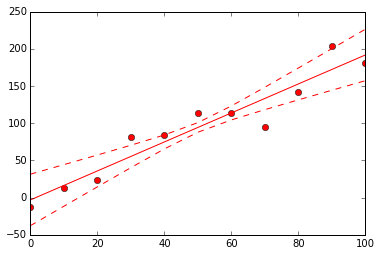

In [87]:
W = np.sqrt(2*4.2565)
n = np.size(c1)

cHat = b0_c1 + b1_c1*x
mse = np.sum([np.power(c1 - cHat, 2) / (n-2)])
scHat = np.sqrt(mse*(1/n + np.power(x-xbar, 2)/np.var(x)))

plt.plot(x, c1, 'ro')
plt.plot(x, cHat, 'r-')
plt.plot(x, cHat + scHat, 'r--')
plt.plot(x, cHat - scHat, 'r--')

**2.7 Analysis of Variance Approach to Linear Regression**

The ANOVA is based on partitioning the *total sum of squares* (SSTO). The SSTO is the variation in our observed data $Y_i$ without taking into account any predictors, which equals $\sum_i (Y_i - \bar{Y})^2$. If we do take into account a predictor $X$, we fit a regression line and can calculate the *error sum of squares* (SSE): $\sum_i (Y_i - \hat{Y_i})^2$, which is the sum of squared deviations from the predicted and actual $Y_i$ values. We can relate SSTO and SSE through the *regression sum of squares*: $\sum_i (\hat{Y_i} - \bar{Y})^2$, such that SSTO = SSR + SSE.

This relation is simple and stems from the fact that the difference, $Y_i - \bar{Y} = \hat{Y_i} - \bar{Y} +  Y_i - \hat{Y_i}$. Remarkably, this result holds for the sum of squares of those terms as well.

To make inferences in the ANOVA approach we need to know the expected values of each of the mean squares (which are the sum of squares divided by their associated degrees of freedom).

**MSE** = SSE / (n-2): lose 2df because of 2 parameters estimated for $\hat{Y_i}$

$$
E[MSE] = E[\frac{SSE}{n-2}] = \sigma^2,
$$

since $\frac{SSE}{\sigma^2} \sim \chi^2(n-2)$ whose $E[\cdot] = n-2$

**MSR** = SSR / 1: lose 1df because 2 df associated with model parameters $\hat{Y_i}$ minus 1 df for calculating the mean $\bar{Y}$

\begin{align}
E[MSR] &= E[\frac{SSR}{1}] = E[b_1^2]\sum(X_i-\bar{X})^2 \\
\sigma^2\{b_1\} &= E[b_1^2] - (E[b_1])^2 = \frac{\sigma^2}{\sum(X_i - \bar{X})^2} \\
E[MSR] &= \beta_1^2\sum(X_i-\bar{X})^2 + \sigma^2
\end{align}

From the above, we can see that when $\beta_1 = 0$, the MSR equals the MSE and when $\beta_1 \gt 0$, MSR will be some degree greater than MSE, and from this we can see a basis for a principled test of whether or not $\beta_1=0$.

It turns out that the ratio $\frac{MSR}{MSE} \sim F(1,n-2)$ if the null hypothesis that $\beta_1=0$ holds. Thus, we use the $F^{*}$ statistic, which is the ratio immediately above for the basis of our inferences. This approach is actually equivalent to a t-test for $b_1 \neq 0$

$$ 
F^{*} = \frac{SSR/1}{SSE/(n-2)} = \frac{b_1^2\sum(X_i - \bar{X})^2}{MSE} = \frac{b_1^2}{s^2\{b_1\}} = (t^{*})^2
$$

**2.8 General Linear Test Approach**

The above ANOVA approach for testing whether or not $\beta_1=0$ is an example of the general test for a linear statistical model.

We test the full model that we consider to be appropriate for the dat: $Y_i = \beta_0 + \beta_1 X_i + \epsilon_i$. Its associated sum of squared error, SSE(F), is just the SSE we've already seen.

We compare this with a reduced model, in this case: $Y_i = \beta_0 + \epsilon_i$. Its associated sum of squared errors is SSE(R), for *reduced*, which is equal to SSTO.

Generally, with a good model the SSE(F) is reduced relative to SSE(R), so the difference between the two is large. Thus, our comparison is based on the following test statistic:

$$
F^* = \frac{SSE(R) - SSE(F)}{df_R - df_F} \div \frac{SSE(F)}{df_F},
$$

which in the case of the current analysis is equivalent to the ANOVA test $F^*$.

**2.9 Descriptive Measures of Linear Association Between X and Y**

Without use of any predictor, SSTO gives us the error when predicting $Y$. When we use a regression model, SSE gives us the error when predicting $Y$. Thus, it is reasonable to make use of these statistics to describe how much using $X$ reduces uncertainty about $Y$. We express this reduction as a proportion of total variance, SSTO, and our measure is the *coefficient of determination*:

$$
R = \frac{SSR}{SSTO} = 1 - \frac{SSE}{SSTO},
$$

which takes values between $0$ and $1$.

Important notes regarding $R^2$ are that:

1. High values do not indicate more useful predictions can be made
2. High values do not mean the estimated regression line is necessarily a good fit (can get high values when a non-linear fit would be better)
3. Values near zero do not necessarily mean X and Y are not associated (association could be non-linear)

The *coefficient of correlation* $r = \pm \sqrt{R^2}$ and is used when both $X$ and $Y$ are random.

**2.11 Normal Correlation Models**

Such models are used when $X$ varies randomly as well and, for our purposes presently, are based on the bivariate normal distribution. Two jointly normal-distributed random variables $Y_1, Y_2$ have marginal distributions $Y_1 \sim \mathcal{N}(\mu_1, \sigma^2_1)$ and $Y_2 \sim \mathcal{N}(\mu_2, \sigma^2_2)$, while their joint distribution has a fifth parameter, $\rho_{12}$, characterizing the strength of correlation between the two variables.

All conditional inferences within the correlation model can be made using the usual regression methods.

### Chapter 3 Diagnostics and Remedial Measures

We will not discuss this chapter here. What follows is a brief list of conerns to be wary of when trying to applying normal linear regression.

1. Nonlinearity of regression function
2. Nonconstancy of error variance
3. Nonindependence of error terms
4. Nonnormality of error terms
5. Omission of important predictors
6. Present of outliers

Additionally, here is a list of good-practice diagnostic plots

1. Plot residuals, and squares of residuals, versus predictor
2. Plot residuals, and squares of residuals, versus fitted values
3. Plot residuals versus time
4. Plot residuals against omitted predictors
5. Box plots of residuals and normal probability plot of residuals



### Chapter 5 Matrix Approach to Simple Linear Regression

In matrix form, our regression model is: $\mathbf{Y} = \mathbf{X\beta} + \mathbf{\epsilon}$, where $\sigma^2\{\epsilon\} = \sigma^2\mathbf{I}$.

To estimate our parameters, we take $\mathbf{b} = \mathbf{(X'X)^{-1}X'Y}$.

We note that $\mathbf{X'Xb} = \mathbf{X'Y}$ gives the normal equations.

When estimating values of $\mathbf{\hat{Y}}$, we use $\mathbf{\hat{Y}} = \mathbf{Xb} = \mathbf{X(X'X)^{-1}X'Y} = \mathbf{HY}$, where $\mathbf{H}$ is called the *hat matrix*. From this standpoint, we can see that our fitted values can be expressed as linear combinations of the response variables $Y_i$. The residuals, too, can be expressed as linear combinations of the response variables: $\mathbf{e} = \mathbf{Y - \hat{Y}} = (\mathbf{I - H})\mathbf{Y}$. Therefore, the covariance matrix for the residuals is: $\sigma^2\{\mathbf{e}\} = \sigma^2(\mathbf{I - H})$.

For inference purposes, we express the covariance matrix for $\mathbf{b}$ as:

\begin{align}
\sigma^2\{\mathbf{b}\} &= \sigma^2\{\mathbf{(X'X)^{-1}X'Y}\} = \mathbf{A}\sigma^2\{\mathbf{Y}\}\mathbf{A'} \\
&= \sigma^2\mathbf{(X'X)^{-1}X'X(X'X)^{-1}} = \sigma^2(\mathbf{X'X^{-1}})
\end{align}

When we estimate the mean response $\hat{Y_h}$ at $X_h$, we can express the variance of this estimate $\sigma^2\{\hat{Y_h}\} = \mathbf{X_h}'\sigma^2\{\mathbf{b}\}\mathbf{X_h}$, where $\mathbf{X_h'} = [1 \  X_h]$. The variance is estimated by the *MSE*, so we get $MSE(\mathbf{X_h}'(\mathbf{X'X})^{-1}\mathbf{X_h})$.

This concludes our discussion of part I of Kutner (2004) Applied Linear Statistical Models, which covers simple linear regression. In the next section of notes, we cover multiple linear regression.